# Make a catalog to cross-match to for astrometry

Gaia does not seem to have enough stars, nor  does 2MASS

VVV does, but the matches aren't good enough, so we need to use our own...

In [1]:
import numpy as np

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import regions
from astroquery.vizier import Vizier

In [3]:
from astropy.visualization import quantity_support

In [4]:
%matplotlib inline
import pylab as pl

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_brick_fov.reg')

In [7]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [8]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

306

In [10]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in gaiacrds])

In [11]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [12]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [13]:
Vizier.ROW_LIMIT = 5e4

In [14]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8
266.51151,0.000000000,-28.757747,0.000000000,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,2,2,2
266.52640,0.001296887,-28.748615,0.001615686,266.52640,0.001919700,-28.748616,0.002009142,266.52640,0.001989142,-28.748614,0.002159149,266.52640,--,-28.748615,--,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,2,2,2
266.52081,0.000648459,-28.747770,0.000807829,266.52081,0.001160735,-28.747769,--,266.52081,--,-28.747770,--,266.52081,--,-28.747770,--,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,2,2,2


In [15]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,FJH,FHK,AJ1JH,e_AJ1JH,AH1JH,e_AH1JH,AH1HK,e_AH1HK,AK1HK,e_AK1HK,AH2HK,e_AH2HK,AK2HK,e_AK2HK
deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266.51151,0.000000000,-28.757747,0.000000000,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52640,0.001296887,-28.748615,0.001615686,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52081,0.000648459,-28.747770,0.000807829,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000


In [16]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [17]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [18]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [19]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [20]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
266.546943,-28.752007,17461126-2845072,14.314,--,13.123,0.103,10.854,--,UAU,020,010,000,0,0
266.543681,-28.762333,17461048-2845443,16.551,--,13.405,0.074,11.001,0.043,UBA,022,011,0c0,0,0
266.543638,-28.753548,17461047-2845127,17.043,--,14.264,--,13.001,0.114,UUB,002,003,00c,0,0


In [21]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [22]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [23]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

In [24]:
from astropy.table import Table

In [25]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

In [26]:
cat[:3]

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,5833.0990,13.9478,"266.51202292672656,-28.71244379461667",5.432087e-07,1.186671e-07,3.937615e-06,5.353917e-07,8.576803e-06,8.109970e-07,2.458620e-05,1.793973e-06,3.592781e-05,2.621533e-06,22.411917,0.138416,21.566686,0.098096,20.423271,0.076466,20.011423,0.076466,20.580707,0.138416,19.735476,0.098096,18.592061,0.076466,18.180213,0.076466,2.1782,2.8666,6.2439,True,0.585579,-1.194646,52,30.827012,5.794598e-03,1.371700e-05,14.492442,0.002567,12.661232,0.002567,1078.0,14.158229,2.967543,0.790402,50.829278,230.253048,"266.5119221395125,-28.712711276151612","266.5123492848947,-28.712707581717357","266.51191567529247,-28.712136272768642","266.5123428183249,-28.71213257835339"
2,5583.6903,9.9767,"266.5120079090694,-28.714617027498274",0.000000e+00,1.355372e-08,1.049331e-05,6.122371e-07,2.061427e-05,8.956838e-07,3.592841e-05,1.742025e-06,5.250219e-05,2.545621e-06,21.347719,0.061569,20.614580,0.046179,20.011405,0.051407,19.599556,0.051407,19.516509,0.061569,18.783370,0.046179,18.180195,0.051407,17.768346,0.051407,1.9645,1.7429,3.4239,False,0.585173,0.127169,29,17.834806,3.925178e-05,1.796305e-06,19.915352,0.048584,18.084142,0.048584,52.0,2.064696,1.264164,0.387724,58.848679,238.272449,"266.5119540130131,-28.71466271691579","266.51205335100553,-28.714661857842547","266.5119530335364,-28.71457559518854","266.51205237144603,-28.714574736115956"
3,5641.4045,14.2819,"266.5120450224522,-28.71411384156673",5.538894e-08,1.943687e-08,1.245881e-06,4.361231e-07,4.705623e-06,6.992653e-07,5.150402e-05,1.827184e-06,7.526283e-05,2.670064e-06,23.661309,0.325876,22.218457,0.150424,19.620397,0.037851,19.208549,0.037851,21.830099,0.325876,20.387247,0.150424,17.789187,0.037851,17.377339,0.037851,3.7769,10.9452,41.3395,True,0.547863,0.409419,4,17.529719,8.517957e-05,2.689429e-06,19.074161,0.033751,17.242951,0.033751,118.0,4.087400,2.054987,0.497238,-64.463922,114.959849,"266.51194843001775,-28.714166123071777","266.5121173038017,-28.714164662610546","266.5119470587639,-28.714044152654456","266.51211593235075,-28.714042692194802"


In [27]:
skycrds_cat = cat['sky_centroid']

In [28]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [29]:
len(idx)

118

In [30]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)

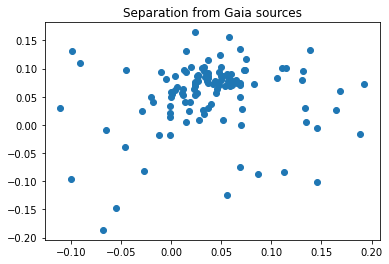

In [31]:
pl.title("Separation from Gaia sources")
pl.scatter(dra, ddec);

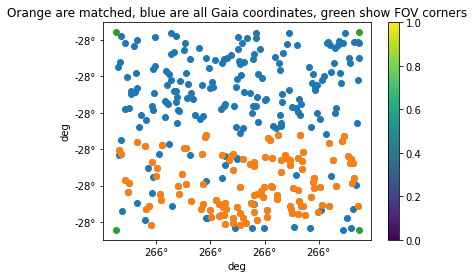

In [32]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("Orange are matched, blue are all Gaia coordinates, green show FOV corners")

In [33]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [34]:
len(idx)

183

In [35]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

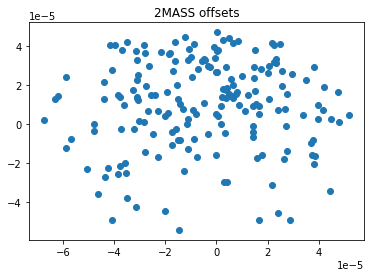

In [36]:
pl.title("2MASS offsets")
pl.scatter(dra, ddec);

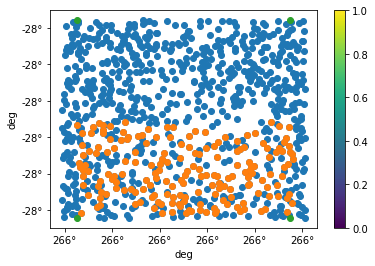

In [37]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [38]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [39]:
len(idx)

11827

In [40]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

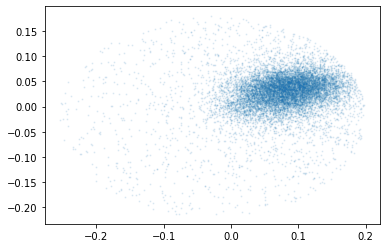

In [41]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

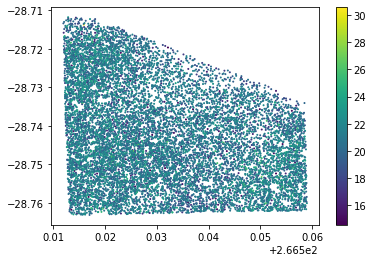

In [42]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

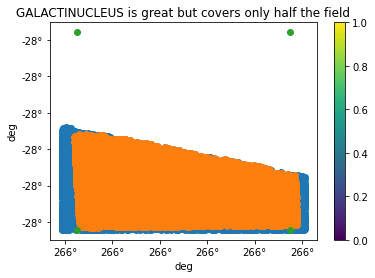

In [43]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("GALACTINUCLEUS is great but covers only half the field")

# VVV offsets

In [44]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [45]:
len(idx)

1469

In [46]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

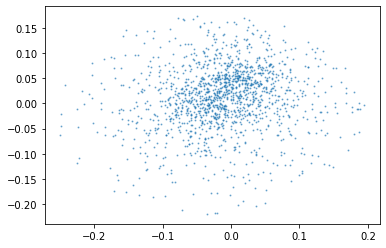

In [47]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

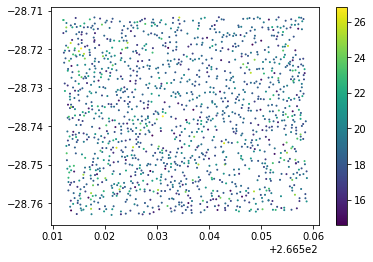

In [48]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

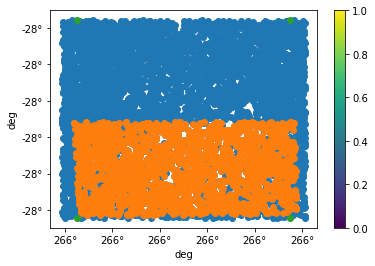

In [49]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [50]:
from astropy.wcs import WCS
from astropy.io import fits

In [51]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [52]:
import numpy as np

## Approximate Jy/beam

In [53]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 5.03530101e-06 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [54]:
1.1e-5 / 165

6.666666666666667e-08

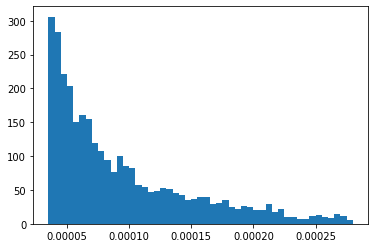

In [55]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [56]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [57]:
len(idx)

888

In [58]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

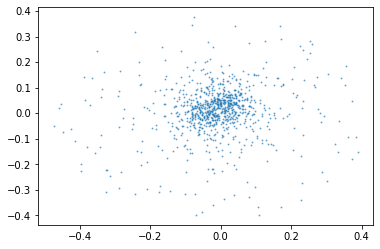

In [59]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

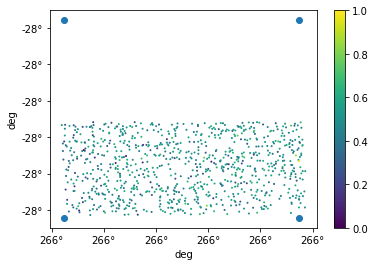

In [60]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

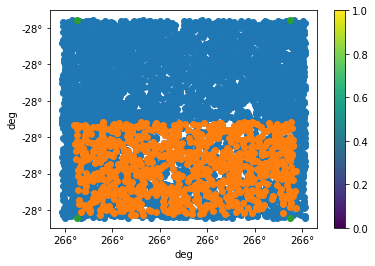

In [61]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [62]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0119395arcsec 0.0179884arcsec


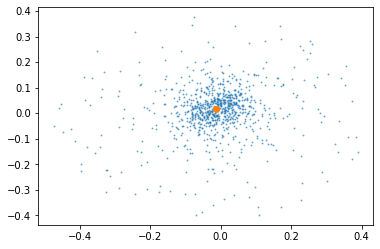

In [63]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [64]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


266.5354784886 -28.737398105933
266.53548180513 -28.737403102697


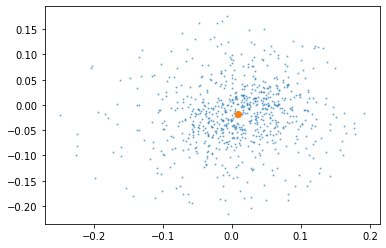

In [65]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

# Check what's happening in the overlap zones

In [66]:
from astropy import wcs

In [67]:
import regions
module_overlap = regions.Regions.read(f'{basepath}/regions/overlap_region.reg')
module_overlap

<Regions([<RectangleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (266.535674, -28.71300934)>, width=11.3759 arcsec, height=150.5041 arcsec, angle=0.0 deg)>])>

In [68]:
import warnings

In [69]:
def check_overlap_zone(filtername = 'f212n'):
    fig = pl.figure(1, figsize=(10,5))
    pl.suptitle(filtername)
    
    ax1 = pl.subplot(1,2,1)
    ax2 = pl.subplot(1,2,2)

    for module in ('nrca', 'nrcb'):
        catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
        imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
        cat = Table.read(catfile)
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            ww = wcs.WCS(fits.getheader(imfile, ext=('SCI', 1)))
        
        skycrds_cat = cat['sky_centroid']
        realigned_skycrds = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
        
        for crds, ax, title in [(skycrds_cat, ax1, 'original'),
                                (realigned_skycrds, ax2, 'realigned')]:
            ax.set_title(title)
            sel = module_overlap[0].contains(crds, ww)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds, 0.3*u.arcsec)

            dra_all = (crds[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec_all = (crds[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds[sel], 0.3*u.arcsec)

            dra = (crds[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec = (crds[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.scatter(dra_all, ddec_all, s=1, alpha=0.2, label=module)
            ax.scatter(dra, ddec, s=3, alpha=0.5, marker='s', label=module)
            ax.scatter(np.median(dra), np.median(ddec), marker='x', s=100)
            ax.axis([-0.3, 0.3, -0.3, 0.3])
    return fig

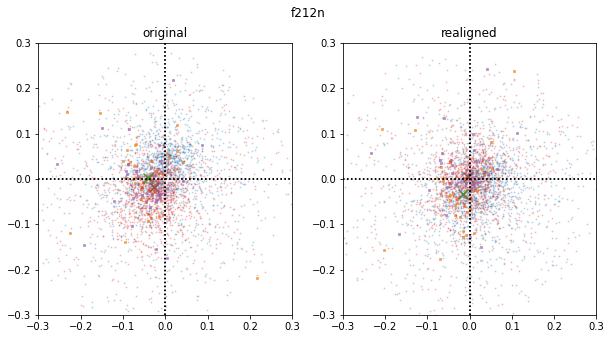

In [70]:
check_overlap_zone('f212n');

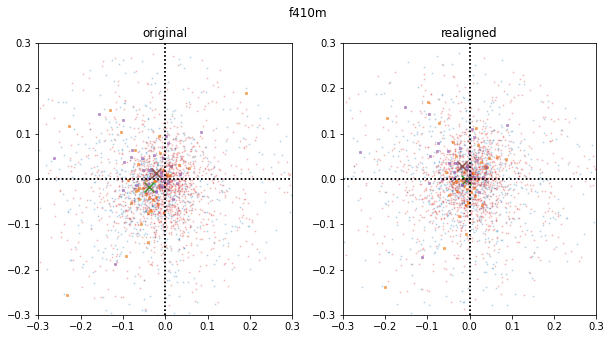

In [71]:
check_overlap_zone('f410m');

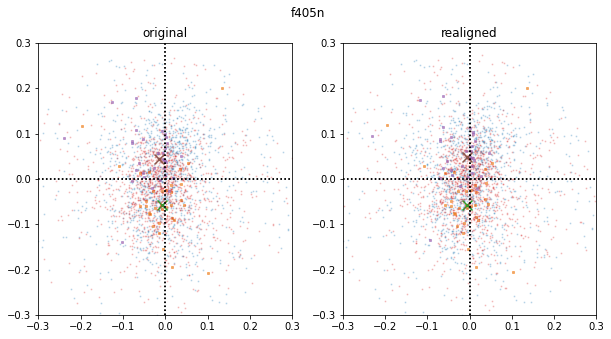

In [72]:
check_overlap_zone('f405n');

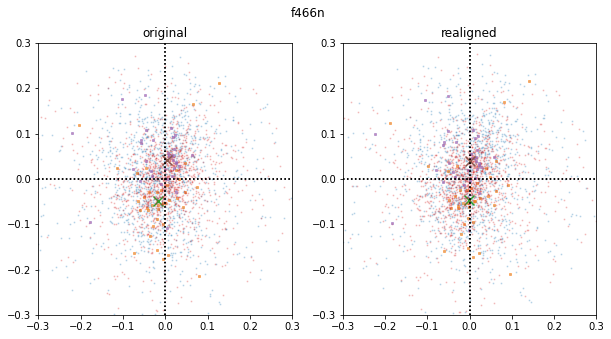

In [73]:
check_overlap_zone('f466n');

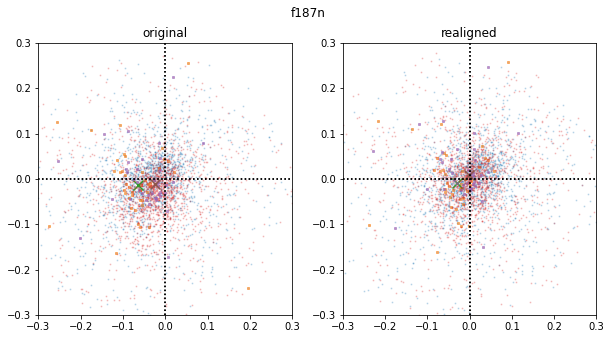

In [74]:
check_overlap_zone('f187n');

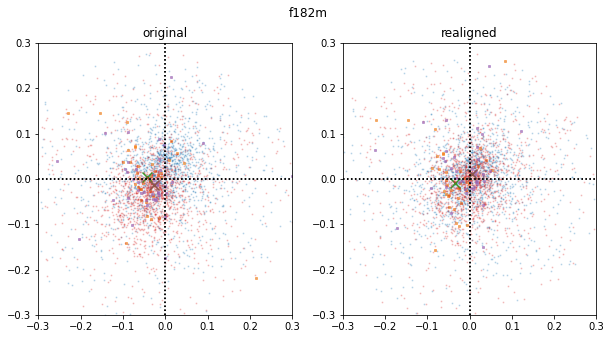

In [75]:
check_overlap_zone('f182m');

# "Production Run" test 

In [76]:
%run $basepath/reduction/align_to_catalogs.py

<Figure size 432x288 with 0 Axes>

In [77]:
realign_to_vvv()

2023-06-09T11:45:23.305762: Before realignment, offset is 0.010620974308039877 arcsec, -0.017895612454310594 arcsec
2023-06-09T11:45:23.489818: CRVAL before 266.53548180513 -28.737403102697
2023-06-09T11:45:23.494138: CRVAL after 266.53547885486 -28.737398131694
2023-06-09T11:45:23.591944: After realignment, offset is 0.0012276189409021754 arcsec, -1.5731416169728618e-09 arcsec
2023-06-09T11:45:23.595810: CRVAL before 266.53547885486 -28.737398131694
2023-06-09T11:45:23.599639: CRVAL after 266.53547851385 -28.737398131694
2023-06-09T11:45:23.672911: After re-realignment, offset is 4.5476019749912666e-05 arcsec, -4.637021646658468e-05 arcsec


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2ab280687790>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab2806edb50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab27917d340>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab279167640>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab2783f5100>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab2783f52b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab2783f58b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ab2783f5760>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2ab278e37280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2ab278e37a30>]

In [78]:
main()

2023-06-09T11:45:23.683531: f182m nrca
2023-06-09T11:45:24.776036: Before realignment, offset is 0.0002023483716584451 arcsec, -0.00028890745795706607 arcsec
2023-06-09T11:45:24.781059: CRVAL before 266.53547795892 -28.737396352038
2023-06-09T11:45:24.784911: CRVAL after 266.53547790271 -28.737396271786
2023-06-09T11:45:25.073300: After realignment, offset is -0.00012901930404041195 arcsec, 0.00032591444423246685 arcsec
2023-06-09T11:45:25.085545: CRVAL before 266.53547790271 -28.737396271786
2023-06-09T11:45:25.089319: CRVAL after 266.53547793855 -28.737396362318
2023-06-09T11:45:25.191138: After re-realignment, offset is 2.9672264645341784e-09 arcsec, -7.482015007553855e-10 arcsec
2023-06-09T11:45:25.191549: f182m nrcb
2023-06-09T11:45:26.360546: Before realignment, offset is 0.0005770238431068719 arcsec, 0.0009604231522075679 arcsec
2023-06-09T11:45:26.366022: CRVAL before 266.53552298674 -28.68886983758
2023-06-09T11:45:26.369797: CRVAL after 266.53552282646 -28.688870104364
2023-0

In [79]:
# do this in a dedicated slurm job

# TEST aligning using tweakreg

In [80]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [81]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [82]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2023-06-09 11:45:44,624 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.530124 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-06-09 11:45:44,626 - stpipe - INFO -  
2023-06-09 11:45:44,627 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-06-09 11:45:44.626825
2023-06-09 11:45:44,628 - stpipe - INFO -       Version 0.8.1
2023-06-09 11:45:44,629 - stpipe - INFO -  
2023-06-09 11:45:45,318 - stpipe - INFO - Aligning image catalog 'GROUP ID: 1' to the reference catalog.
2023-06-09 11:45:45,329 - stpipe - INFO - Matching sources from 'Unknown' catalog with sources from the reference 'II/348/vvv2' catalog.
2023-06-09 11:45:45,330 - stpipe - INFO - Computing initial guess for X and Y shifts...
2023-06-09 11:45:50,831 - stpipe - INFO - Found initial X and Y shifts of -0.3625

dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

# Crossmatch F212N with VVV, then we'll save that and use it as our reference case


Work done Oct 20, 2022

Idea is to establish a new and *usable* master table, since VVV stars are mostly saturated in JW.

In [83]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [84]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [85]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
#cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

Catalogs:

 * F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
 * F212N/f212n_?merged?_crowdsource.fits doesn't exist yet
 * F212N/f212n_?merged?_daophot_iterative.fits doesn't exist yet

In [86]:
# TODO: replace nrca w/full

crowdtbl = Table.read('F212N/f212n_nrca_crowdsource.fits')
crowdheader = fits.getheader('F212N/f212n_nrca_crowdsource.fits')
daobasictbl = Table.read('F212N/f212n_nrca_daophot_basic.fits')
daoitertbl = Table.read('F212N/f212n_nrca_daophot_iterative.fits')
len(crowdtbl), len(daobasictbl), len(daoitertbl)

(152674, 128686, 161311)

In [87]:
if 'skycoord' not in crowdtbl.colnames:
    print ("Swapping coords")
    # I've now fixed crowdtbl to include skycoord, but it hasn't run yet
    ww = wcs.WCS(crowdheader)
    # crowdtbl are still backwards now
    crowdtbl['skycoord'] = ww.pixel_to_world(crowdtbl['y'], crowdtbl['x'])

In [88]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daobasictbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daobasictbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daobasictbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-09T11:45:53.270426: -0.0214254arcsec -0.0149147arcsec


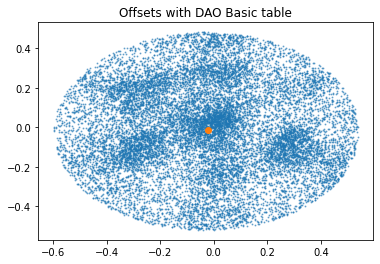

In [89]:
pl.title("Offsets with DAO Basic table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [90]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-09T11:45:53.872934: -0.0265499arcsec -0.0174674arcsec


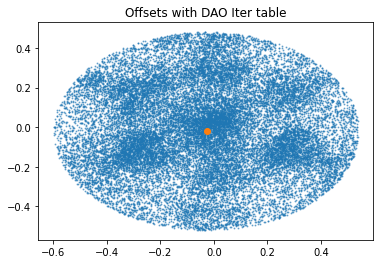

In [91]:
pl.title("Offsets with DAO Iter table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [92]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crowdtbl['skycoord'], 0.5*u.arcsec)
dra = (crowdtbl['skycoord'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (crowdtbl['skycoord'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-09T11:45:54.233553: -0.0185652arcsec -0.0130552arcsec


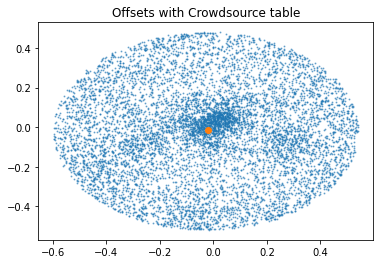

In [93]:
pl.title("Offsets with Crowdsource table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

### Intermediate conclusions:

The iter table performed best but still quite poorly.  Only matches within <0.15 arcsec are remotely valid, so more source rejection is needed to get a good result.

In [94]:
satstarcat = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits')
if 'skycoord_fit' not in satstarcat.colnames:
    ww = WCS(fits.getheader('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits', ext=('SCI', 1)))
    satstarcat['skycoord_fit'] = ww.pixel_to_world(satstarcat['x_fit'], satstarcat['y_fit'])
    satstarcat.write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits', overwrite=True)
satstarcat[:5]

x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc,skycoord_fit
,,,,,,,,,,,"deg,deg"
float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,SkyCoord
4331.580246913581,2430.543209876543,4692292.664740454,1,1,4333.509210200824,2431.5681762455106,25722554.336474825,84260.6463433766,0.004641435038153716,0.004657132263340242,"266.5360675051915,-28.725124055743454"
6184.138888888889,2459.027777777778,2104352.069079362,1,1,6185.2121314358,2459.00775085794,12636947.677892487,27587.73279741156,0.0028834528557805912,0.0030911443965695225,"266.53594199194913,-28.709011156621354"
6912.103448275862,3572.2413793103447,1633015.7910213778,2,2,6912.689228572919,3572.239983020334,9379745.147764899,18347.17668610022,0.0023409550186267443,0.0022880392669205212,"266.5468262389749,-28.702472816723404"
5405.5,128.0,475881.0659013706,1,1,5405.730360225119,127.9579744232393,1340901.0433892203,26203.229301907828,0.03106393978978386,0.026386253929317125,"266.5129882125096,-28.71622887663567"
9747.285714285714,257.5,861437.1200121259,2,2,9746.611720644889,257.28450801140093,2451439.690301492,17996.97610636004,0.012744261355983654,0.00960824615193339,"266.513346894016,-28.678443802395552"


### Try to reject sources near saturated sources (about 0.4" in F4* and 0.95" (?!?!) in F1*)

In [95]:
satcrd = satstarcat['skycoord_fit']
daoitercrd = daoitertbl['skycoord_centroid']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(daoitertbl['skycoord_centroid'], 0.95*u.arcsec)
len(idx_s), len(sidx_s), len(sep_s), len(sep3d_s)

(14498, 14498, 14498, 14498)

In [96]:
inds = np.arange(len(daoitercrd))
unsat_inds = inds[~np.in1d(inds, idx_s)]
#daoitercrd_nosat = daoitercrd[unsat_inds]
daoitertbl_nosat = daoitertbl[unsat_inds]

In [97]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
sat_idx = np.isin(idx, idx_s)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
dra_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].ra - vvvdr2_crds[sidx[sat_idx]].ra).to(u.arcsec)
ddec_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].dec - vvvdr2_crds[sidx[sat_idx]].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-09T11:45:55.022734: -0.0265499arcsec -0.0174674arcsec


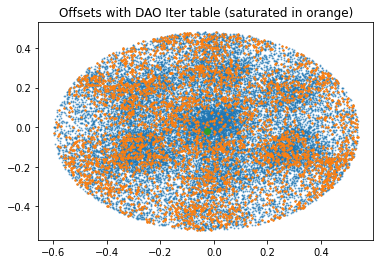

In [98]:
pl.title("Offsets with DAO Iter table (saturated in orange)")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

## Try to match saturated star centroids

In [99]:
satcrd = satstarcat['skycoord_fit']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra_s = (satcrd[sidx_s].ra - vvvdr2_crds[idx_s].ra).to(u.arcsec)
ddec_s = (satcrd[sidx_s].dec - vvvdr2_crds[idx_s].dec).to(u.arcsec)
len(idx_s), len(satcrd), len(vvvdr2_crds)

(242, 316, 4693)

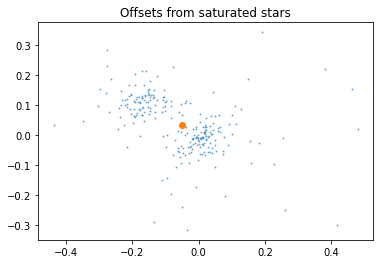

In [100]:
pl.title("Offsets from saturated stars")
pl.scatter(dra_s, ddec_s, s=1, alpha=0.5)
pl.scatter(np.median(dra_s), np.median(ddec_s));

In [101]:
# for each coordinate in DAO catalog, find VVV match (for plotting)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
idx, sidx, sep, sep3d = daoitercrd_nosat.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra = (daoitercrd_nosat[sidx].ra - vvvdr2_crds[idx].ra).to(u.arcsec)
ddec = (daoitercrd_nosat[sidx].dec - vvvdr2_crds[idx].dec).to(u.arcsec)
len(idx), len(daoitercrd), len(vvvdr2_crds)

(22706, 161311, 4693)

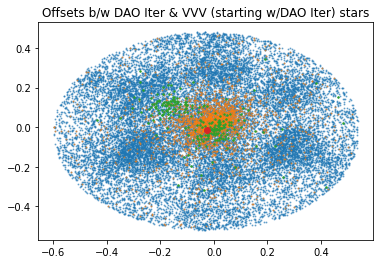

In [102]:
pl.title("Offsets b/w DAO Iter & VVV (starting w/DAO Iter) stars")
pl.scatter(dra, ddec, s=1, alpha=0.5)
bright = daoitertbl_nosat['flux_fit'][sidx] > 1e4
pl.scatter(dra[bright], ddec[bright], s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

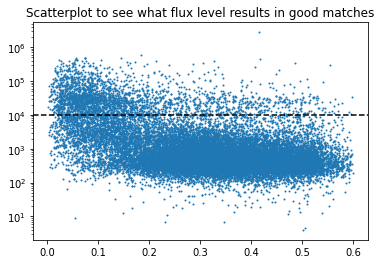

In [103]:
pl.title("Scatterplot to see what flux level results in good matches")
pl.scatter((dra**2 + ddec**2)**0.5, daoitertbl_nosat['flux_fit'][sidx], s=1)
pl.semilogy();
pl.axhline(1e4, color='k', linestyle='--');

In [104]:
# for each coordinate in DAO catalog, find VVV match (for saving)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
bright = daoitertbl_nosat['flux_fit'] > 1e4
idxd, sepd, _ = daoitercrd_nosat[bright].match_to_catalog_sky(vvvdr2_crds)

drad = (daoitercrd_nosat[bright].ra - vvvdr2_crds[idxd].ra).to(u.arcsec)
ddecd = (daoitercrd_nosat[bright].dec - vvvdr2_crds[idxd].dec).to(u.arcsec)

# then, for each vvv object, find the closest DAO
idxv, sepv, _ = vvvdr2_crds.match_to_catalog_sky(daoitercrd_nosat[bright])
drav = (daoitercrd_nosat[bright][idxv].ra - vvvdr2_crds.ra).to(u.arcsec)
ddecv = (daoitercrd_nosat[bright][idxv].dec - vvvdr2_crds.dec).to(u.arcsec)

len(idxd), len(idxv), bright.sum(), len(vvvdr2_crds)

(4831, 4693, 4831, 4693)

(-0.5, 0.5, -0.5, 0.5)

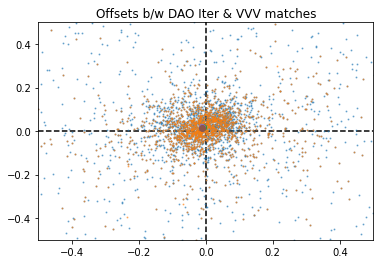

In [105]:
pl.title("Offsets b/w DAO Iter & VVV matches")
pl.scatter(drad, ddecd, s=1, alpha=0.5)
pl.scatter(drav, ddecv, s=1, alpha=0.5)
pl.scatter(np.median(drad), np.median(ddecd));
pl.scatter(np.median(drav), np.median(ddecv));
pl.scatter(np.median(drad[sepd<0.15*u.arcsec]), np.median(ddecd[sepd<0.15*u.arcsec]));
pl.scatter(np.median(drav[sepv<0.15*u.arcsec]), np.median(ddecv[sepv<0.15*u.arcsec]));
pl.axhline(0, color='k', linestyle='--', zorder=-5)
pl.axvline(0, color='k', linestyle='--', zorder=-5);
pl.axis([-0.5,0.5,-0.5,0.5])

# Conclusions again: There's no offset?

So, what the hell?  Why do the catalogs _look_ so offset when overlaid on the data?

Maybe it's just that the catalogs have never run to completion on the final data.

# Some plots for the paper

todo - show that offset ~ zero

In [106]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [107]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [108]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_merged

2023-06-09 11:45:56,760 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp

2023-06-09 11:45:59,902 - stpipe - WARNING - /orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm

2023-06-09 11:46:06,342 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.508342 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-06-09 11:46:06,366 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'ob

<Figure size 1000x800 with 0 Axes>

In [155]:
%run $basepath/analysis/selections.py --module=merged
assert len(basetable) == len(basetable_merged)

Selecting module merged
1233 saturated in near_saturated_f212n_f212n
34 saturated in near_saturated_f466n_f466n
540 saturated in near_saturated_f405n_f405n
1060 saturated in near_saturated_f187n_f187n
7632 saturated in near_saturated_f182m_f182m
9455 near saturated out of 289206.  That leaves 279751 not near unsaturated
126 saturated in replaced_saturated_f212n
9 saturated in replaced_saturated_f466n
188 saturated in replaced_saturated_f405n
55 saturated in replaced_saturated_f187n
222 saturated in replaced_saturated_f182m
805 saturated out of 289206.  That leaves 288401 unsaturated
Filter f410m has qf=61931, spread=68644, fracflux=47462 ok, totaling 45239.  There are 289206 total, of which 227768 are masked and 61438 are unmasked. qfmasksum=218119, inverse=71087.
Filter f212n has qf=119077, spread=123906, fracflux=101766 ok, totaling 101274.  There are 289206 total, of which 167569 are masked and 121637 are unmasked. qfmasksum=164843, inverse=124363.
Filter f466n has qf=46231, spread=

In [112]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(basetable['skycoord_f410m'], 0.5*u.arcsec)
dra = (basetable['skycoord_f410m'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (basetable['skycoord_f410m'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-06-10T17:11:22.518262: -0.0064999arcsec 0.00328813arcsec


In [115]:
%run $basepath/reduction/align_to_catalogs.py

In [120]:
vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module='merged',
                                   fov_regname='regions/nircam_brick_fov.reg')
reference_coordinates = vvvdr2_crds

In [156]:
skycrds_cat = basetable['skycoord_f410m']
skycrds_cat_a = basetable_nrca['skycoord_f410m']
skycrds_cat_b = basetable_nrcb['skycoord_f410m']
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[all_good], 0.4*u.arcsec)
idxa, sidxa, sepa, sep3da = reference_coordinates.search_around_sky(skycrds_cat_a[all_good_a], 0.4*u.arcsec)
idxb, sidxb, sepb, sep3db = reference_coordinates.search_around_sky(skycrds_cat_b[all_good_b], 0.4*u.arcsec)

In [149]:
len(skycrds_cat), len(basetable), len(vvvdr2), sel.sum(), idx.max(), sidx.max()

(530916, 530916, 4693, 778, 50157, 4687)

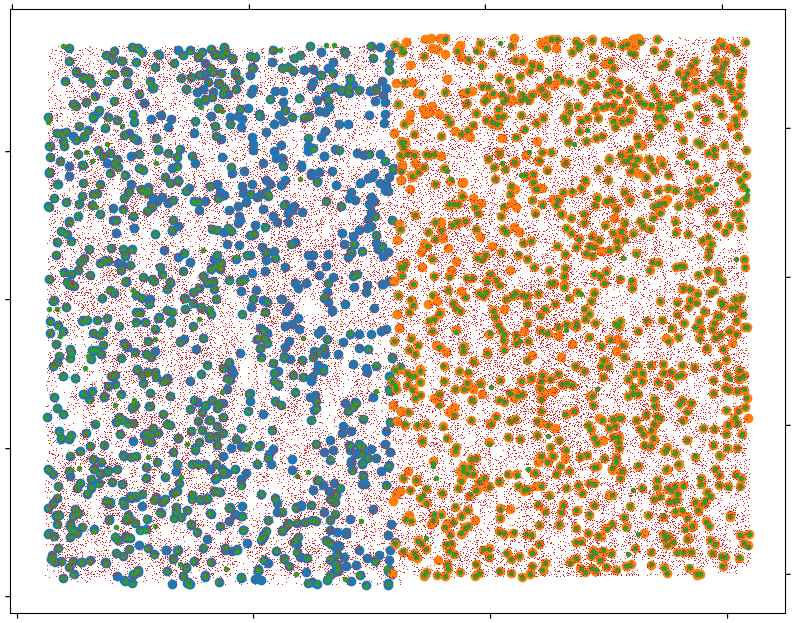

In [159]:
ax = pl.subplot(projection=ww_merged)
ax.plot_coord(skycrds_cat_a[all_good_a][idxa], 'o')
ax.plot_coord(skycrds_cat_b[all_good_b][idxb], 'o')
ax.plot_coord(vvvdr2_crds[sidx], '.')
ax.plot_coord(skycrds_cat[all_good], ',')

### F212 vs VVVK plot

There are significant differences betwen NRCA, NRCB, and merged.

They are strict offsets, so I guess multiplicative?

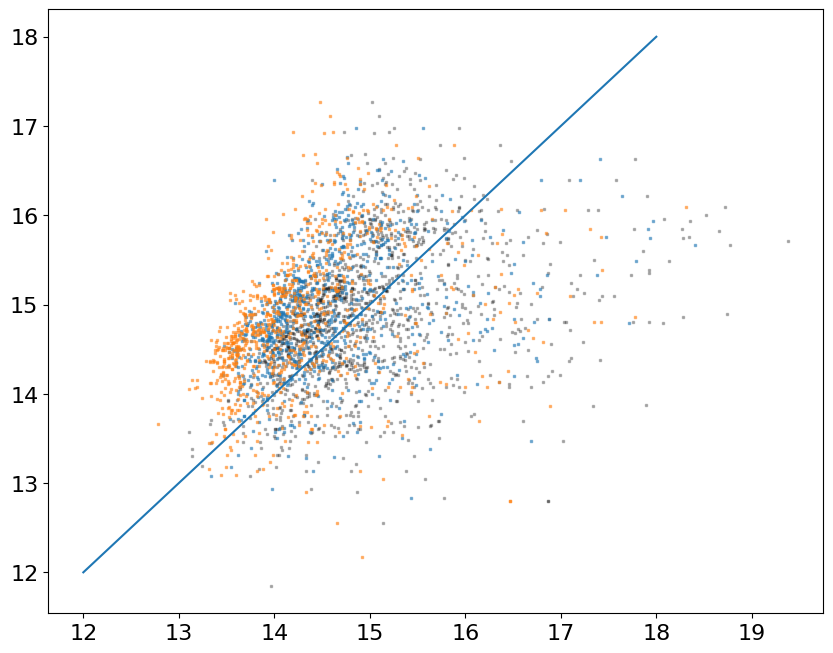

In [172]:
pl.scatter(basetable['mag_ab_f212n'][all_good][idx], vvvdr2['Ksmag3'][sidx], marker=',', s=1, alpha=0.25, color='k')
pl.scatter(basetable_nrca['mag_ab_f212n'][all_good_a][idxa], vvvdr2['Ksmag3'][sidxa], marker=',', s=3, alpha=0.5)
pl.scatter(basetable_nrcb['mag_ab_f212n'][all_good_b][idxb], vvvdr2['Ksmag3'][sidxb], marker=',', s=3, alpha=0.5)
pl.plot([12,18], [12,18])